In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot, likert_plot_tab, group_comparison
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "C"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "C"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "C"]

# 2. Auswertung CP
Anmerkung zu Plots (von Tümer): test_hypothesis nutzt halt den Median. Der Plot ist etwas unpräzise, weil er nur die absoluten Werte (0,1,2,3) nimmt. Median von pandas nimmt aber, wenn man genau in der Mitte zwischen zwei Werten steht dann den Mittelwert aus den beiden. Deshalb gibt es in der Gruppe auch Werte wie 2.5. Das ist wichtig für das korrekte testen der Hypothesen. Wenn du jetzt die Balken vom Plot nimmst, fehlen halt die Zwischenwerte.
Deswegen gelten eher die Werte sicher Gruppe1/2 (sicher = safe+almost safe)

### a) Einflussfaktor "Breite RVA"
Gruppe1: schmale RVA <br>
Gruppe2: breite RVA

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

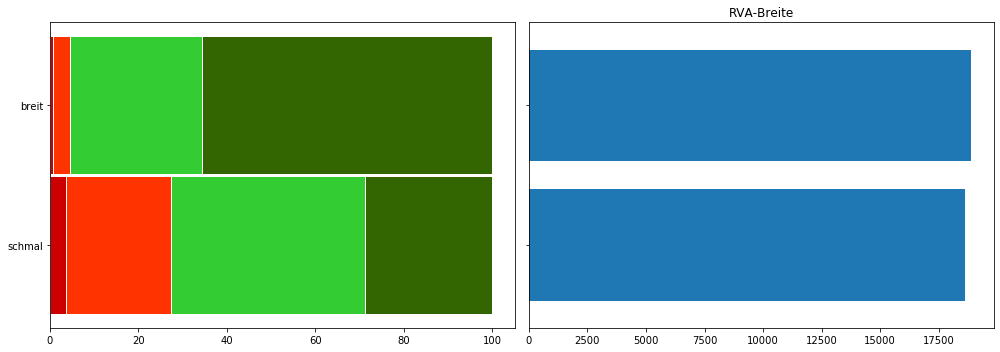

          unsafe  almost_unsafe  almost_safe       safe
group1  3.729178      23.567974    43.981730  28.721118
group2  0.677428       3.889918    29.751257  65.681397
Mittelwert von  schmal - 1.976947877485223
Mittelwert von  breit - 2.604366234453559
Bootstrap Ergebnis: -33.333333333333336    (-33.333333333333336, -33.333333333333336)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -24.0910187157291
Ist der Unterschied signifikant? True
sicher Gruppe 1  69.1026329930145 sicher Gruppe2 94.61233130457794


In [3]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["RVA-Breite"] == 2)] [["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 3.5)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "RVA-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### b) Einflussfaktor "Breite Gehweg"
Gruppe1: schmal <br>
Gruppe2: breit

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

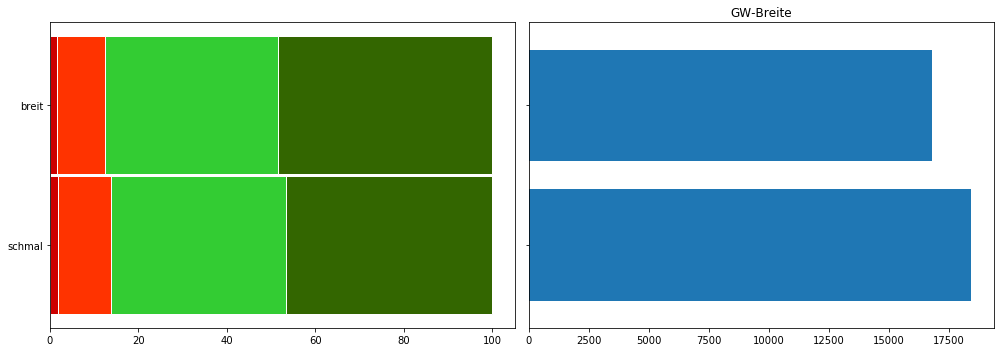

          unsafe  almost_unsafe  almost_safe       safe
group1  1.740120      12.069713    39.491516  46.698650
group2  1.680147      10.785655    39.101344  48.432854
Mittelwert von  schmal - 2.311486962649753
Mittelwert von  breit - 2.342869037706673
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -1.3394720128120565
Ist der Unterschied signifikant? True
sicher Gruppe 1  83.79140239605356 sicher Gruppe2 85.4882835732128


In [4]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### b1.1) Einflussfaktor "Breite Gehweg" <br>schmale RVA
Gruppe1: schmal <br>
Gruppe2: breit

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

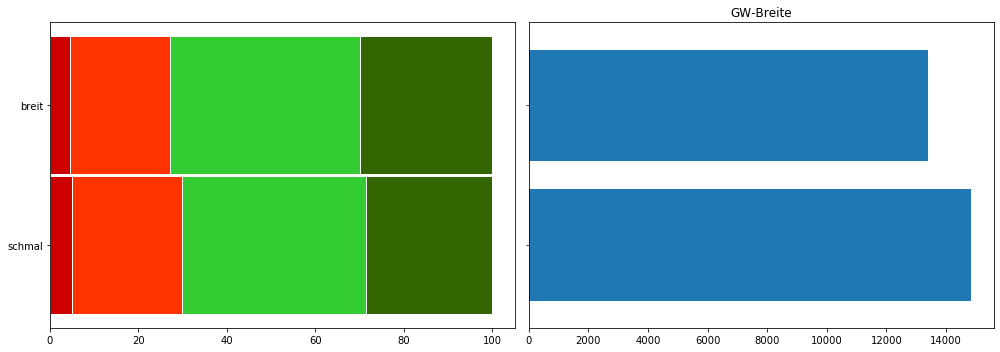

          unsafe  almost_unsafe  almost_safe       safe
group1  4.886257      24.949522    41.590389  28.573832
group2  4.425142      22.781837    42.767671  30.025350
Mittelwert von  schmal - 1.9385179701171087
Mittelwert von  breit - 1.9839322994333433
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -2.289106807183186
Ist der Unterschied signifikant? True
sicher Gruppe 1  66.78557006326558 sicher Gruppe2 69.8180733671339


In [5]:
df = bike_data["cp"]
df = df[(df["RVA-Breite"] == 2)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### b1.2) Einflussfaktor "Breite Gehweg" <br>breite RVA
Gruppe1: schmal <br>
Gruppe2: breit

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

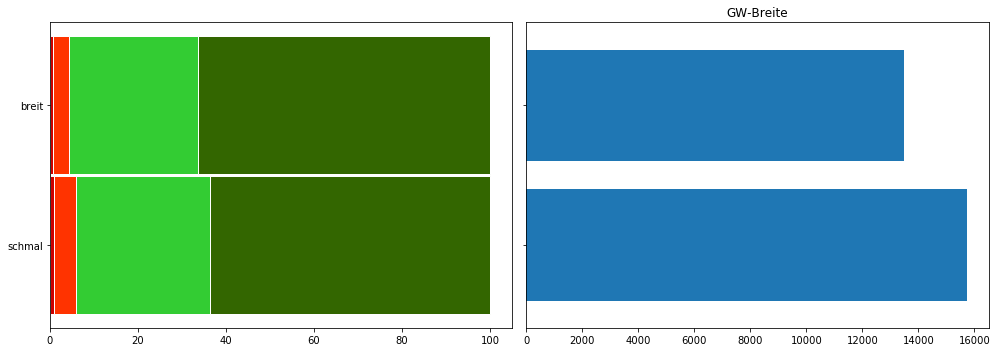

          unsafe  almost_unsafe  almost_safe       safe
group1  0.836301       5.192699    30.294454  63.676545
group2  0.734585       3.702604    29.242413  66.320398
Mittelwert von  schmal - 2.568112439582803
Mittelwert von  breit - 2.6114862358091564
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -1.6608855000498985
Ist der Unterschied signifikant? True
sicher Gruppe 1  93.03612312388707 sicher Gruppe2 95.01372709059879


In [6]:
df = bike_data["cp"]
df = df[(df["RVA-Breite"] == 3.5)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

#### b2) Einflussfaktor  "Breite Gehweg" <br> nur mit Auslage 
Gruppe1: schmaler Gehweg <br>
Gruppe2: breiter Gehweg

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

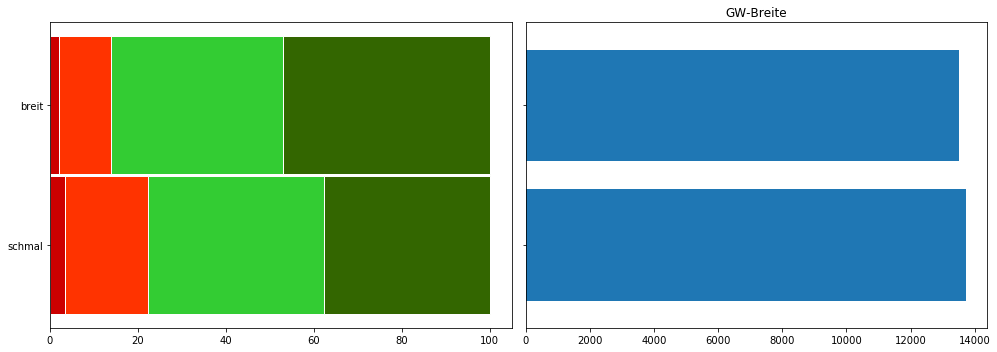

          unsafe  almost_unsafe  almost_safe       safe
group1  3.390943      18.938234    40.016772  37.654051
group2  2.043688      11.751203    39.159571  47.045539
Mittelwert von  schmal - 2.1193393130605993
Mittelwert von  breit - 2.312069603850426
Bootstrap Ergebnis: -20.0    (-40.0, -20.0)
Unterschied im Mittelwert von schmal zu breit (in Prozent) -8.335834287551785
Ist der Unterschied signifikant? True
sicher Gruppe 1  74.95806898563406 sicher Gruppe2 84.23546834505738


In [7]:
df = bike_data["cp"]
df = df[(df["GW-Geschäftsnutzung"] == "ja")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Breite"] == "schmal")] [["rating", "sessionID"]]
group2 = df[(df["GW-Breite"] == "breit")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Breite", ["schmal", "breit"])
group_comparison(group1,group2)

### c) Einflussfaktor "Auslage / Fußgängeraufkommen"
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

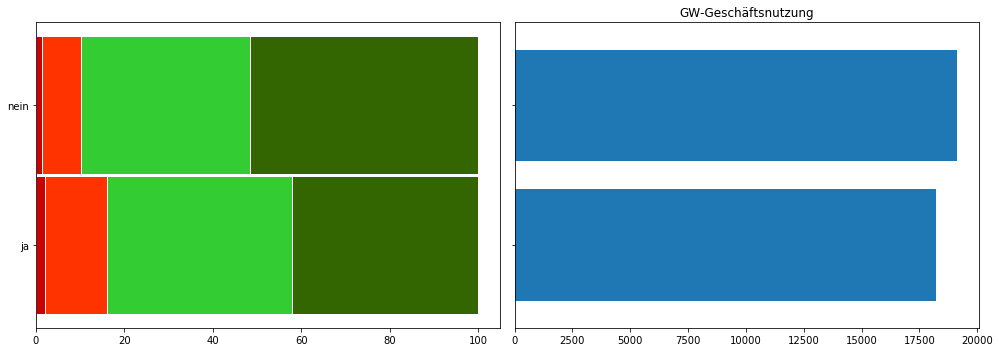

          unsafe  almost_unsafe  almost_safe       safe
group1  2.049158      14.119164    41.770450  42.061228
group2  1.257648       8.936882    38.139936  51.665534
Mittelwert von  ja - 2.238437482855105
Mittelwert von  nein - 2.4021335564503477
Bootstrap Ergebnis: -20.0    (-20.0, -20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -6.8146116670189505
Ist der Unterschied signifikant? True
sicher Gruppe 1  81.0994678224612 sicher Gruppe2 87.78957276577944


In [8]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

#### c1) Einflussfaktor  "Auslage / Fußgängeraufkommen" <br> nur mit Gehweg
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

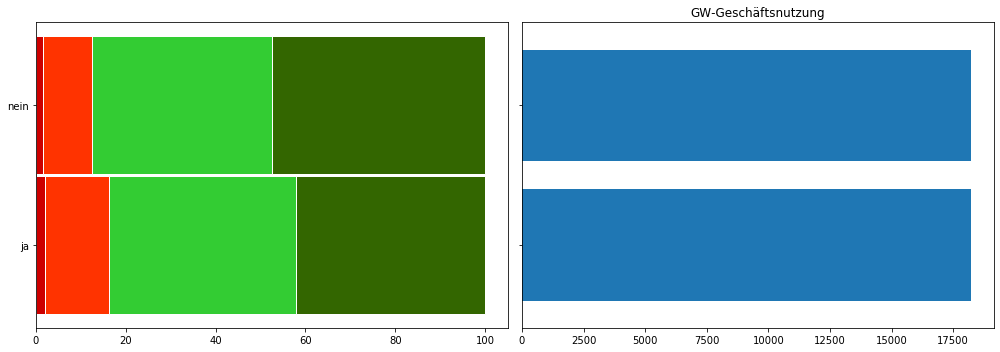

          unsafe  almost_unsafe  almost_safe       safe
group1  2.049158      14.119164    41.770450  42.061228
group2  1.609895      10.846909    40.041687  47.501508
Mittelwert von  ja - 2.238437482855105
Mittelwert von  nein - 2.3343480884208216
Bootstrap Ergebnis: -20.0    (-20.0, -20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -4.10866768505805
Ist der Unterschied signifikant? True
sicher Gruppe 1  81.0994678224612 sicher Gruppe2 85.13520925895452


In [9]:
df = bike_data["cp"]
df = df[(df["Häuserfront"] == "normal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

#### c1.1) Einflussfaktor  "Auslage / Fußgängeraufkommen" <br> nur schmaler Gehweg,
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

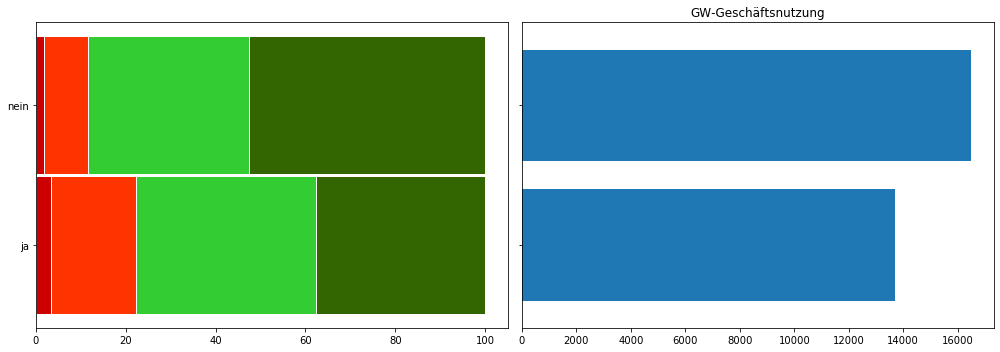

          unsafe  almost_unsafe  almost_safe       safe
group1  3.390943      18.938234    40.016772  37.654051
group2  1.710024       9.920563    35.795282  52.574131
Mittelwert von  ja - 2.1193393130605993
Mittelwert von  nein - 2.392335213146565
Bootstrap Ergebnis: -20.0    (-20.0, -20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -11.411272909656441
Ist der Unterschied signifikant? True
sicher Gruppe 1  74.95806898563406 sicher Gruppe2 86.4047055969923


In [10]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

#### c1.2) Einflussfaktor  "Auslage / Fußgängeraufkommen" <br> nur breiter Gehweg,
Gruppe1: mit Auslagen <br>
Gruppe2: ohne Auslagen

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

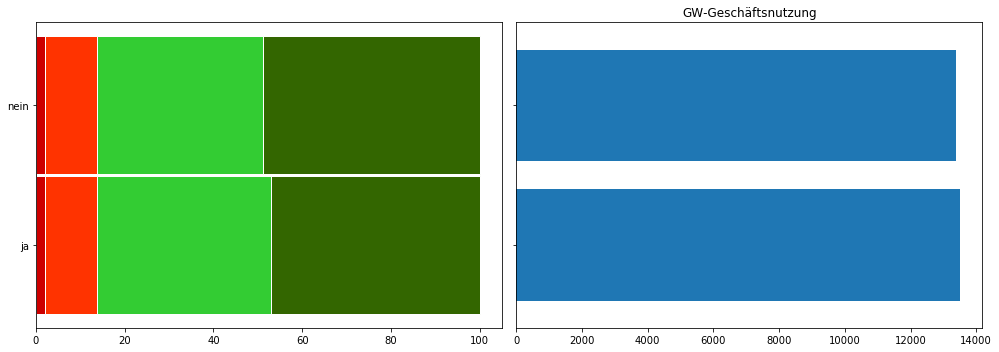

          unsafe  almost_unsafe  almost_safe       safe
group1  2.043688      11.751203    39.159571  47.045539
group2  2.039444      11.687584    37.483191  48.789780
Mittelwert von  ja - 2.312069603850426
Mittelwert von  nein - 2.33023307933662
Bootstrap Ergebnis: 0.0    (0.0, 20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -0.7794703305544524
Ist der Unterschied signifikant? False
sicher Gruppe 1  84.23546834505738 sicher Gruppe2 84.15508740475124


In [11]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "breit")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["GW-Geschäftsnutzung"] == "ja")] [["rating", "sessionID"]]
group2 = df[(df["GW-Geschäftsnutzung"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "GW-Geschäftsnutzung", ["ja", "nein"])
group_comparison(group1,group2)

### e) Einflussfaktor "Trennung rechts"
Gruppe 1: mit Trennung<br>
Gruppe 2: ohne Trennung

<Figure size 432x288 with 0 Axes>

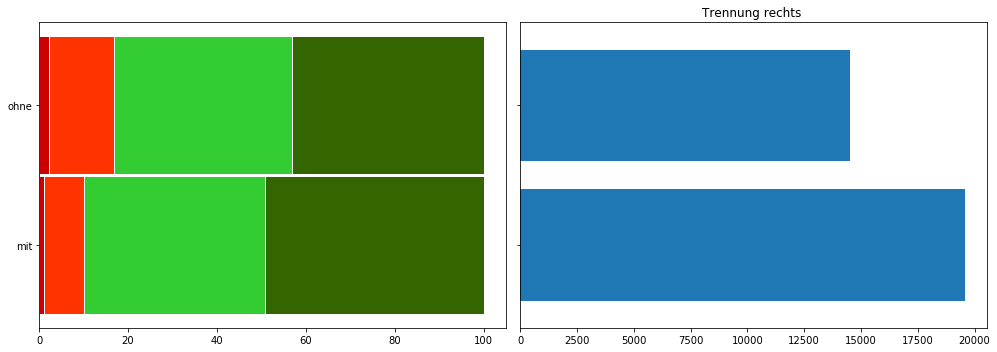

          unsafe  almost_unsafe  almost_safe       safe
group1  1.159346       8.960674    40.620531  49.259448
group2  2.286838      14.541943    40.042081  43.129139
Mittelwert von  mit - 2.3798008171603677
Mittelwert von  ohne - 2.2401352097130243
Bootstrap Ergebnis: 25.0    (25.0, 25.0)
Unterschied im Mittelwert von mit zu ohne (in Prozent) 6.234695425604936
Ist der Unterschied signifikant? True
sicher Gruppe 1  87.8140960163432 sicher Gruppe2 80.87058498896248


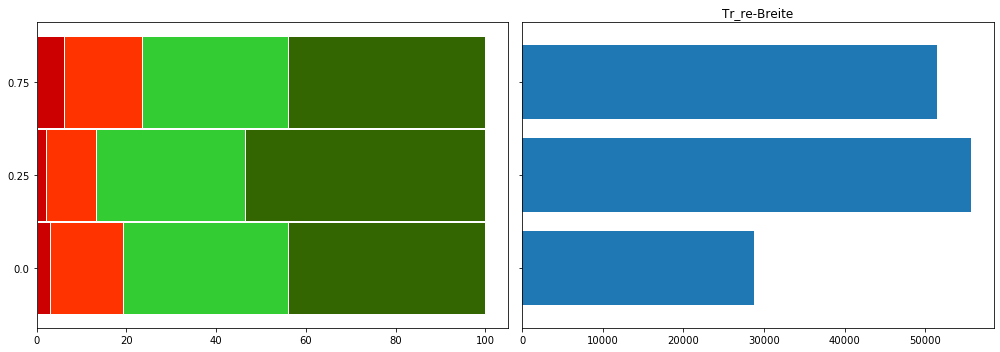

        unsafe  almost_unsafe  almost_safe       safe
0.00  2.892087      16.314157    36.712081  44.081675
0.25  2.022052      11.176957    33.281256  53.519736
0.75  6.118837      17.419041    32.422445  44.039677


<function src.visualization.visualize.likert_plot(df, exclude=['duration', 'rating', 'sessionID'], filename_prefix='')>

In [3]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Breite"] != 0)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Breite"] == 0)] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts ", ["mit", "ohne"])
group_comparison(group1,group2)

likert_plot (df[["Tr_re-Breite","rating"]])
likert_plot

##### e1.1) Einflussfaktor "Trennung rechts" - Art
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung Aufpflaster

<Figure size 432x288 with 0 Axes>

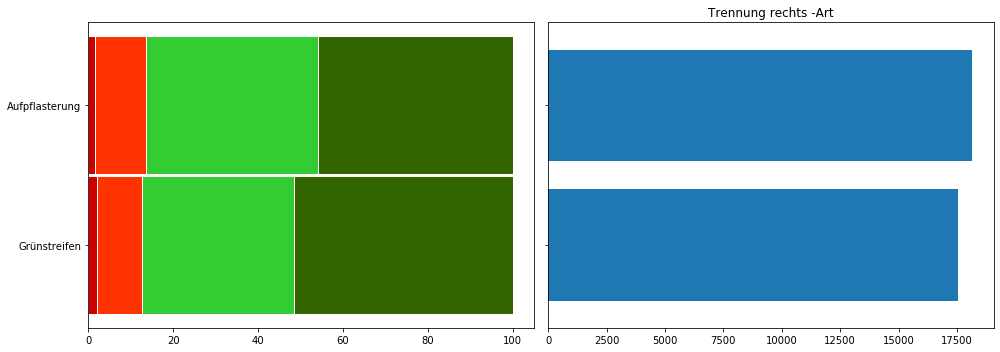

          unsafe  almost_unsafe  almost_safe       safe
group1  2.045351      10.562899    35.796490  51.595260
group2  1.610505      11.854421    40.584737  45.950336
Mittelwert von  Grünstreifen - 2.3694165907019142
Mittelwert von  Aufpflasterung - 2.30874903644973
Bootstrap Ergebnis: 0.0    (-25.0, 0.0)
Unterschied im Mittelwert von Grünstreifen zu Aufpflasterung (in Prozent) 2.6277240745696413
Ist der Unterschied signifikant? False
sicher Gruppe 1  85.2267547857794 sicher Gruppe2 84.269353595419


In [13]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Aufpflasterung")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "Aufpflasterung"])
group_comparison(group1,group2)

##### e1.2) Einflussfaktor "Trennung rechts" - Art <br> nur breite Trennung
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung Aufpflaster

<Figure size 432x288 with 0 Axes>

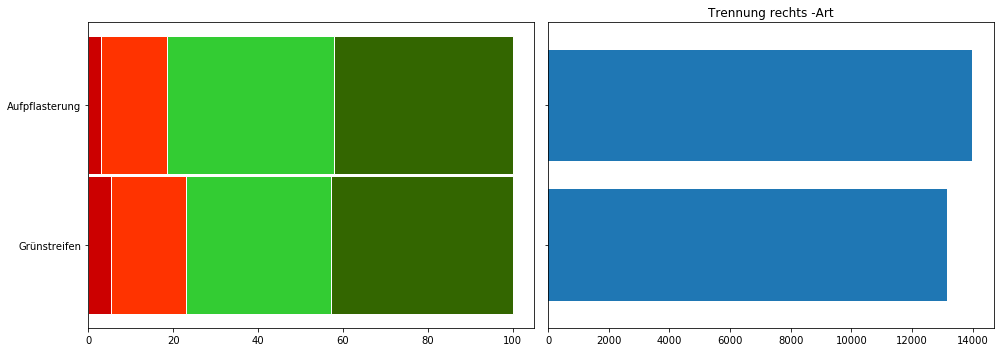

          unsafe  almost_unsafe  almost_safe       safe
group1  5.200487      17.807959    34.193107  42.798448
group2  2.901451      15.557779    39.366112  42.174659
Mittelwert von  Grünstreifen - 2.145895153313551
Mittelwert von  Aufpflasterung - 2.208139784177803
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grünstreifen zu Aufpflasterung (in Prozent) -2.818871853596389
Ist der Unterschied signifikant? True
sicher Gruppe 1  74.58723274747014 sicher Gruppe2 79.23961980990495


In [14]:
df = bike_data["cp"]
df = df[(df["Tr_re-Breite"] == 0.75)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Aufpflasterung")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "Aufpflasterung"])
group_comparison(group1,group2)

##### e1.3) Einflussfaktor "Trennung rechts" - Art <br> nur schmale Trennung
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung Aufpflaster

<Figure size 432x288 with 0 Axes>

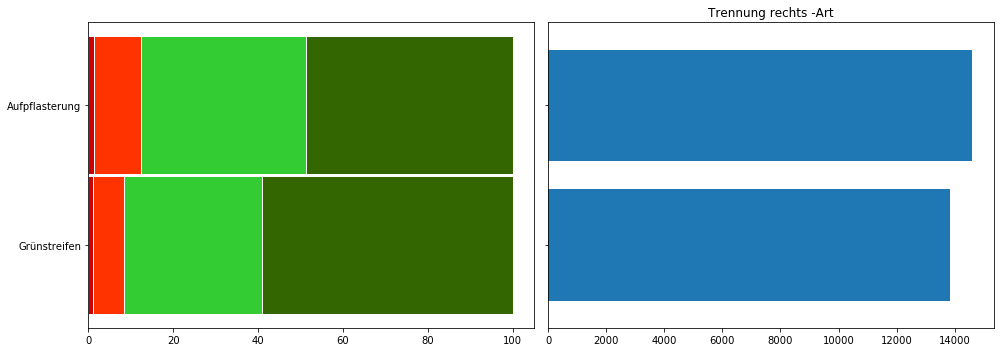

          unsafe  almost_unsafe  almost_safe       safe
group1  1.069751       7.368992    32.587640  58.973618
group2  1.423877      11.014513    38.851999  48.709611
Mittelwert von  Grünstreifen - 2.4946512468377304
Mittelwert von  Aufpflasterung - 2.348473439211391
Bootstrap Ergebnis: 20.0    (20.0, 20.0)
Unterschied im Mittelwert von Grünstreifen zu Aufpflasterung (in Prozent) 6.224375595894554
Ist der Unterschied signifikant? True
sicher Gruppe 1  90.26382363570654 sicher Gruppe2 85.71330777656078


In [15]:
df = bike_data["cp"]
df = df[(df["Tr_re-Breite"] == 0.25)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Aufpflasterung")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "Aufpflasterung"])
group_comparison(group1,group2)

##### e1.4) Einflussfaktor "Trennung rechts" - Art <br> nur schmale Trennung
Gruppe1: Trennung Grünstreifen <br>
Gruppe2: Trennung keine Trennung

<Figure size 432x288 with 0 Axes>

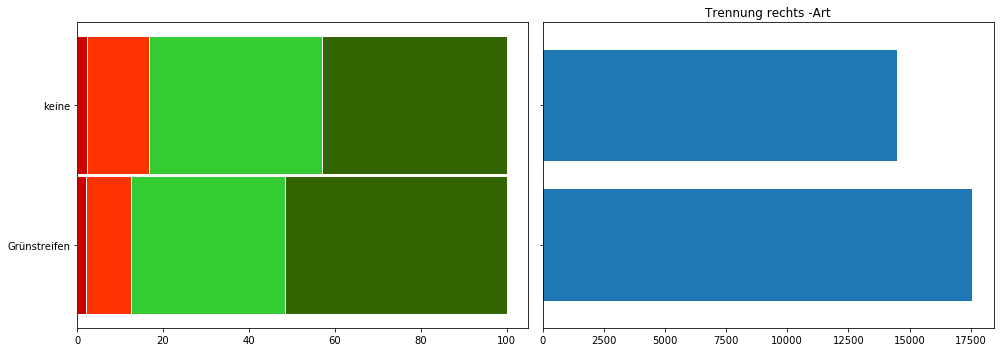

          unsafe  almost_unsafe  almost_safe       safe
group1  2.045351      10.562899    35.796490  51.595260
group2  2.286838      14.541943    40.042081  43.129139
Mittelwert von  Grünstreifen - 2.3694165907019142
Mittelwert von  keine - 2.2401352097130243
Bootstrap Ergebnis: 25.0    (25.0, 25.0)
Unterschied im Mittelwert von Grünstreifen zu keine (in Prozent) 5.771141868059462
Ist der Unterschied signifikant? True
sicher Gruppe 1  85.2267547857794 sicher Gruppe2 80.87058498896248


In [16]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Tr_re-Art"] == "Grünstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts -Art", ["Grünstreifen", "keine"])
group_comparison(group1,group2)

##### e2.1) Einflussfaktor "Trennung rechts"  <br> bei schmaler RVA und schmalem Gehweg mit Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

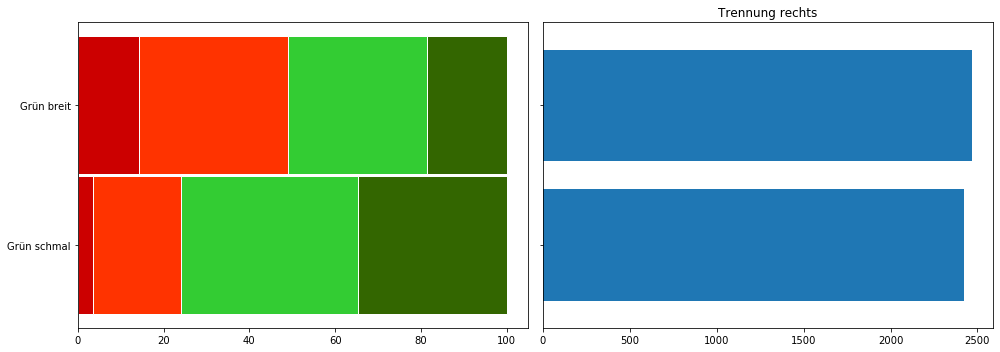

          unsafe  almost_unsafe  almost_safe       safe
group1   3.65099      20.420792    41.336634  34.591584
group2  14.28282      34.744733    32.313614  18.658833
Mittelwert von  Grün schmal - 2.068688118811881
Mittelwert von  Grün breit - 1.553484602917342
Bootstrap Ergebnis: 0.0    (-100.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) 33.164378644437214
Ist der Unterschied signifikant? False
sicher Gruppe 1  75.33003300330033 sicher Gruppe2 50.36466774716369


<Figure size 432x288 with 0 Axes>

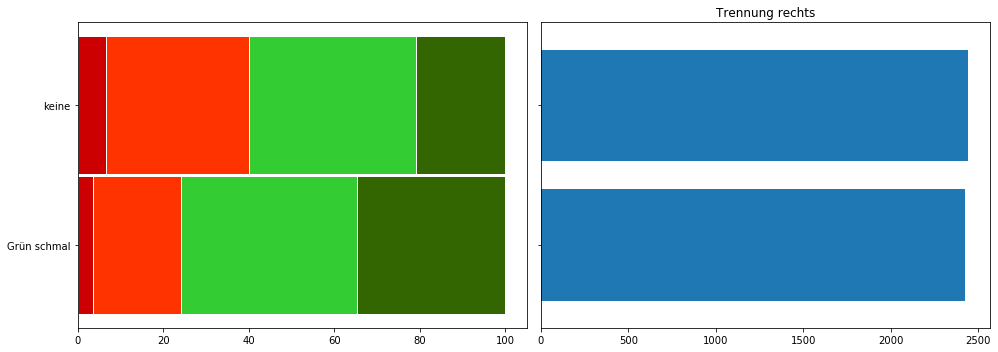

          unsafe  almost_unsafe  almost_safe       safe
group1  3.650990      20.420792    41.336634  34.591584
group2  6.590258      33.585755    39.029881  20.794106
Mittelwert von  Grün schmal - 2.068688118811881
Mittelwert von  keine - 1.7402783462955382
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 18.87110606274081
Ist der Unterschied signifikant? True
sicher Gruppe 1  75.33003300330033 sicher Gruppe2 59.14858780188293


<Figure size 432x288 with 0 Axes>

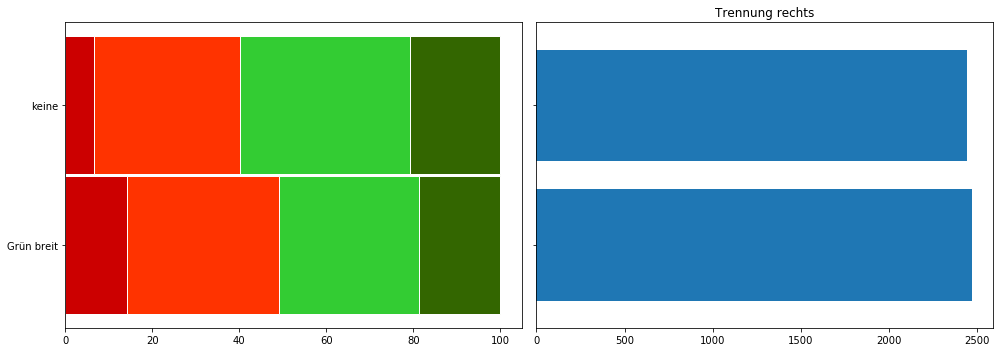

           unsafe  almost_unsafe  almost_safe       safe
group1  14.282820      34.744733    32.313614  18.658833
group2   6.590258      33.585755    39.029881  20.794106
Mittelwert von  Grün breit - 1.553484602917342
Mittelwert von  keine - 1.7402783462955382
Bootstrap Ergebnis: 0.0    (0.0, 50.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) -10.733555570338318
Ist der Unterschied signifikant? False
sicher Gruppe 1  50.36466774716369 sicher Gruppe2 59.14858780188293


In [17]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] == "ja") & (df["RVA-Breite"] == 2.0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

##### e2.2) Einflussfaktor "Trennung rechts"  <br> bei breiter RVA und schmalem Gehweg mit Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

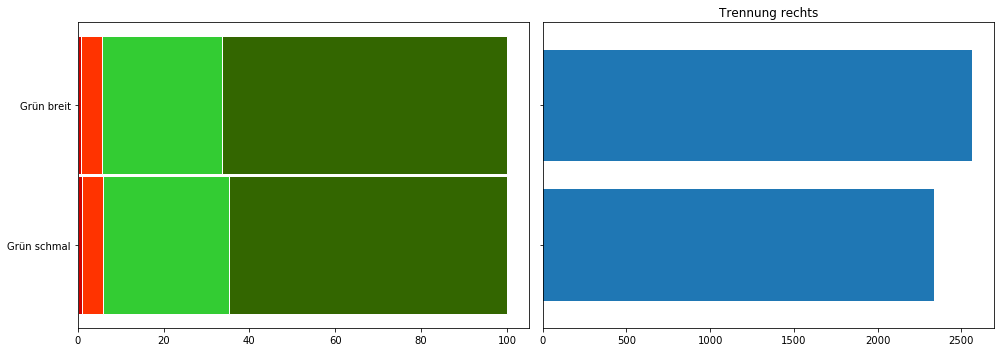

          unsafe  almost_unsafe  almost_safe       safe
group1  0.941378       5.006418    29.332478  64.719726
group2  0.721248       4.912281    28.050682  66.315789
Mittelwert von  Grün schmal - 2.578305519897304
Mittelwert von  Grün breit - 2.5996101364522417
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) -0.8195312157080802
Ist der Unterschied signifikant? True
sicher Gruppe 1  93.88104407359863 sicher Gruppe2 94.15204678362574


<Figure size 432x288 with 0 Axes>

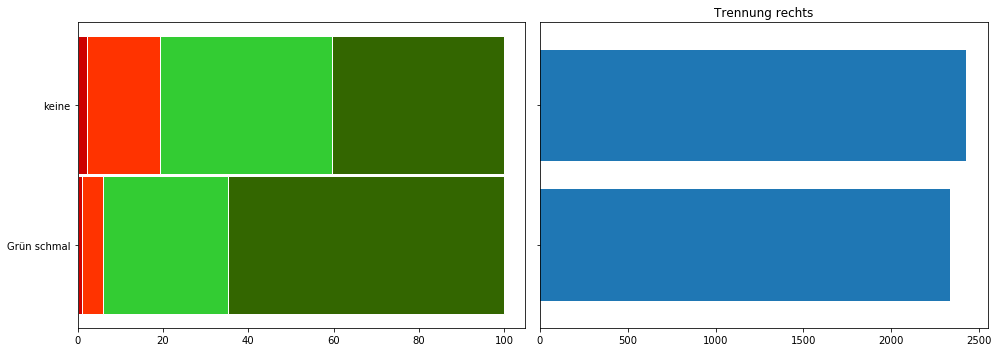

          unsafe  almost_unsafe  almost_safe       safe
group1  0.941378       5.006418    29.332478  64.719726
group2  2.266172      16.975690    40.337866  40.420272
Mittelwert von  Grün schmal - 2.578305519897304
Mittelwert von  keine - 2.189122373300371
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 17.778044358945174
Ist der Unterschied signifikant? True
sicher Gruppe 1  93.88104407359863 sicher Gruppe2 80.3873094355171


<Figure size 432x288 with 0 Axes>

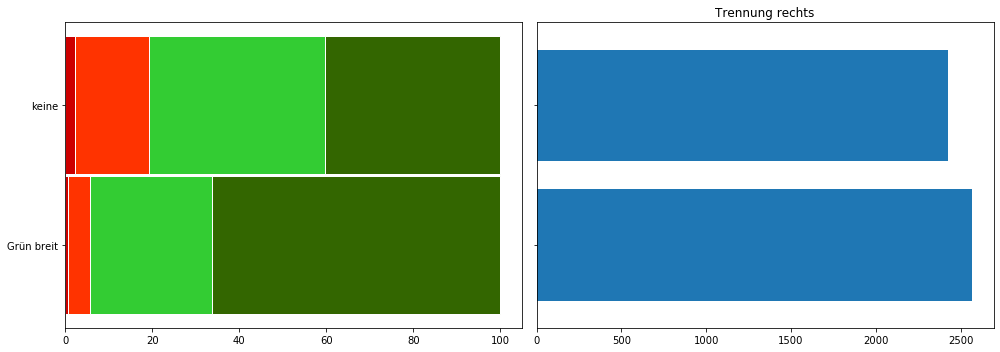

          unsafe  almost_unsafe  almost_safe       safe
group1  0.721248       4.912281    28.050682  66.315789
group2  2.266172      16.975690    40.337866  40.420272
Mittelwert von  Grün breit - 2.5996101364522417
Mittelwert von  keine - 2.189122373300371
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) 18.75124790456598
Ist der Unterschied signifikant? True
sicher Gruppe 1  94.15204678362574 sicher Gruppe2 80.3873094355171


In [18]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] == "ja") & (df["RVA-Breite"] == 3.5)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

##### e3.1) Einflussfaktor "Trennung rechts"  <br> bei schmaler RVA und schmalem Gehweg ohne Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

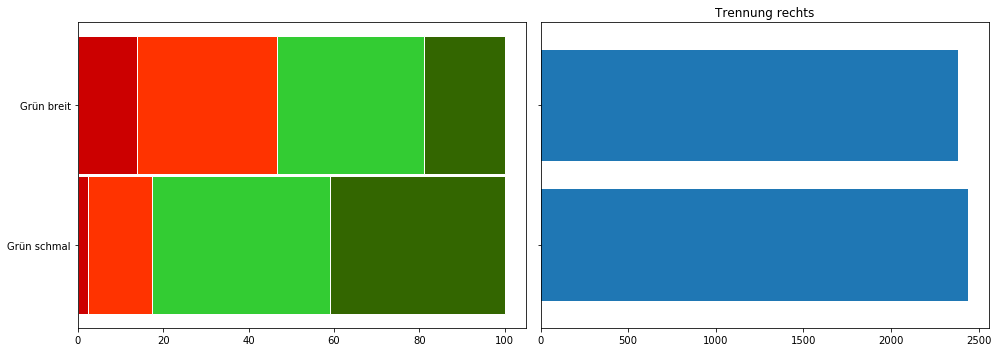

           unsafe  almost_unsafe  almost_safe       safe
group1   2.338941      15.038982    41.608535  41.013541
group2  13.970588      32.689076    34.411765  18.928571
Mittelwert von  Grün schmal - 2.2129667624128024
Mittelwert von  Grün breit - 1.5829831932773109
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) 39.797236749634244
Ist der Unterschied signifikant? True
sicher Gruppe 1  82.06811653672548 sicher Gruppe2 52.73109243697478


<Figure size 432x288 with 0 Axes>

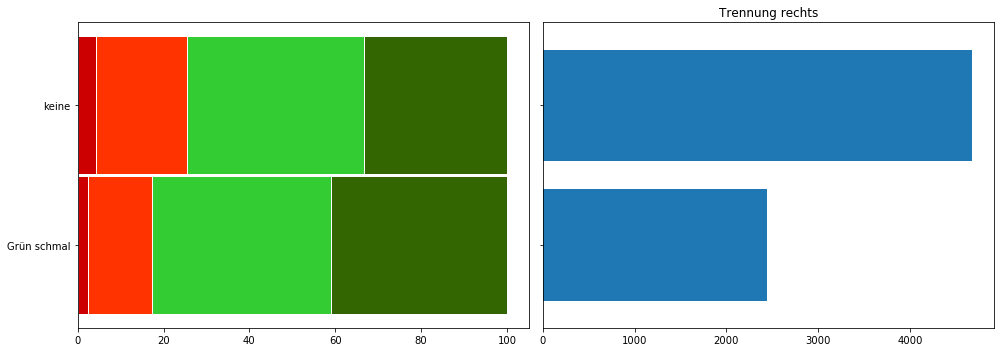

          unsafe  almost_unsafe  almost_safe       safe
group1  2.338941      15.038982    41.608535  41.013541
group2  4.169339      21.381227    41.169553  33.279880
Mittelwert von  Grün schmal - 2.2129667624128024
Mittelwert von  keine - 2.0355997434252724
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 8.713256108446805
Ist der Unterschied signifikant? True
sicher Gruppe 1  82.06811653672548 sicher Gruppe2 73.33760957878982


<Figure size 432x288 with 0 Axes>

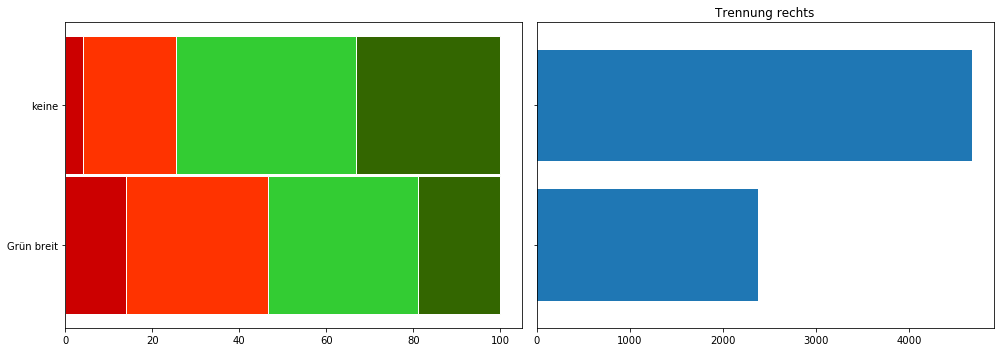

           unsafe  almost_unsafe  almost_safe       safe
group1  13.970588      32.689076    34.411765  18.928571
group2   4.169339      21.381227    41.169553  33.279880
Mittelwert von  Grün breit - 1.5829831932773109
Mittelwert von  keine - 2.0355997434252724
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) -22.235046531610905
Ist der Unterschied signifikant? True
sicher Gruppe 1  52.73109243697478 sicher Gruppe2 73.33760957878982


In [19]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] != "ja") & (df["RVA-Breite"] == 2.0)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

##### e3.1) Einflussfaktor "Trennung rechts"  <br> bei breiter RVA und schmalem Gehweg ohne Auslage
Gruppe1: Trennung Grünstreifen schmal <br>
Gruppe2: Trennung Grünstreifen breit <br>
Gruppe3: Trennung keine Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

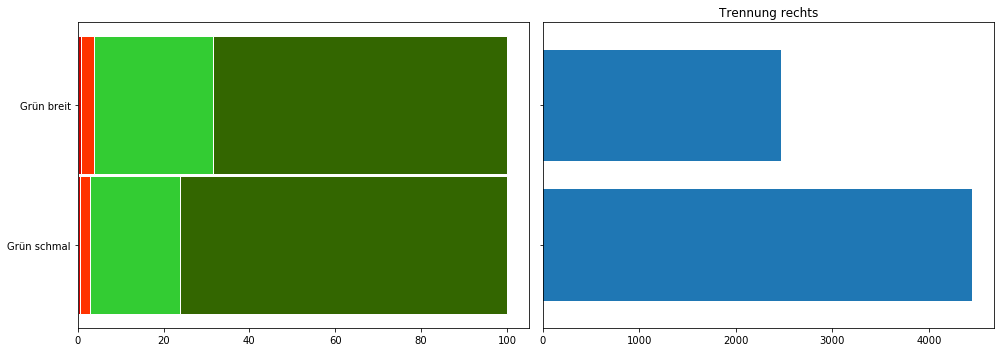

          unsafe  almost_unsafe  almost_safe       safe
group1  0.607287       2.350427    20.928925  76.113360
group2  0.850202       2.995951    27.591093  68.562753
Mittelwert von  Grün schmal - 2.725483580746739
Mittelwert von  Grün breit - 2.638663967611336
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu Grün breit (in Prozent) 3.2902868345906335
Ist der Unterschied signifikant? True
sicher Gruppe 1  96.96356275303644 sicher Gruppe2 96.11336032388664


<Figure size 432x288 with 0 Axes>

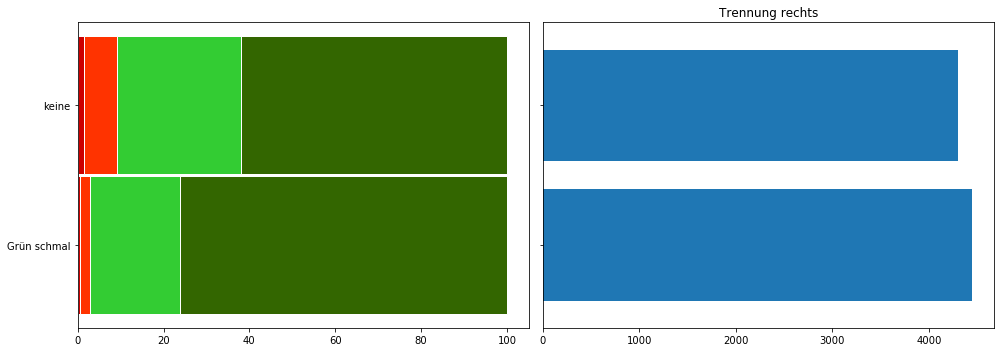

          unsafe  almost_unsafe  almost_safe       safe
group1  0.607287       2.350427    20.928925  76.113360
group2  1.523256       7.662791    28.802326  62.011628
Mittelwert von  Grün schmal - 2.725483580746739
Mittelwert von  keine - 2.5130232558139536
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün schmal zu keine (in Prozent) 8.45437161957224
Ist der Unterschied signifikant? True
sicher Gruppe 1  96.96356275303644 sicher Gruppe2 90.4186046511628


<Figure size 432x288 with 0 Axes>

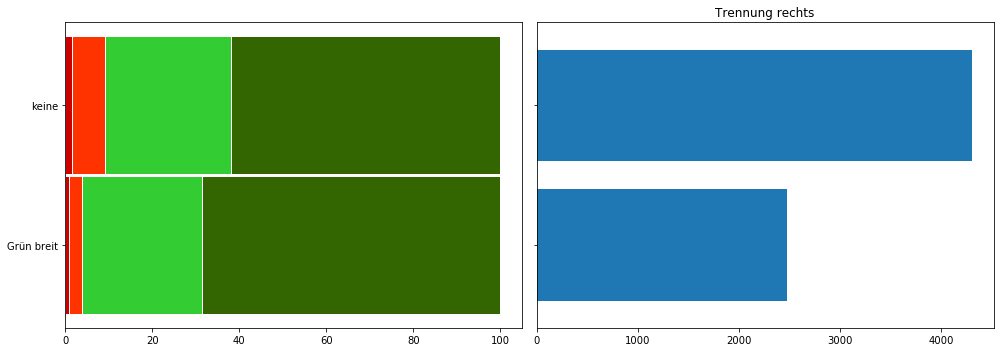

          unsafe  almost_unsafe  almost_safe       safe
group1  0.850202       2.995951    27.591093  68.562753
group2  1.523256       7.662791    28.802326  62.011628
Mittelwert von  Grün breit - 2.638663967611336
Mittelwert von  keine - 2.5130232558139536
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Grün breit zu keine (in Prozent) 4.999584126677263
Ist der Unterschied signifikant? True
sicher Gruppe 1  96.11336032388664 sicher Gruppe2 90.4186046511628


In [20]:
df = bike_data["cp"]
df = df[(df["GW-Breite"] == "schmal") & (df["GW-Geschäftsnutzung"] != "ja") & (df["RVA-Breite"] == 3.5)]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.25)] [["rating", "sessionID"]]
group2 = df[(df["Tr_re-Art"] == "Grünstreifen") & (df["Tr_re-Breite"] == 0.75)] [["rating", "sessionID"]]
group3 = df[(df["Tr_re-Art"] == "-")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung rechts", ["Grün schmal", "Grün breit"])
group_comparison(group1,group2)

test_hypothesis(group1, group3, "Trennung rechts", ["Grün schmal", "keine"])
group_comparison(group1,group3)

test_hypothesis(group2, group3, "Trennung rechts", ["Grün breit", "keine"])
group_comparison(group2,group3)

### f) Einflussfaktor "Trennung links"
Gruppe1: Trennung schmal <br>
Gruppe2: Trennung breit

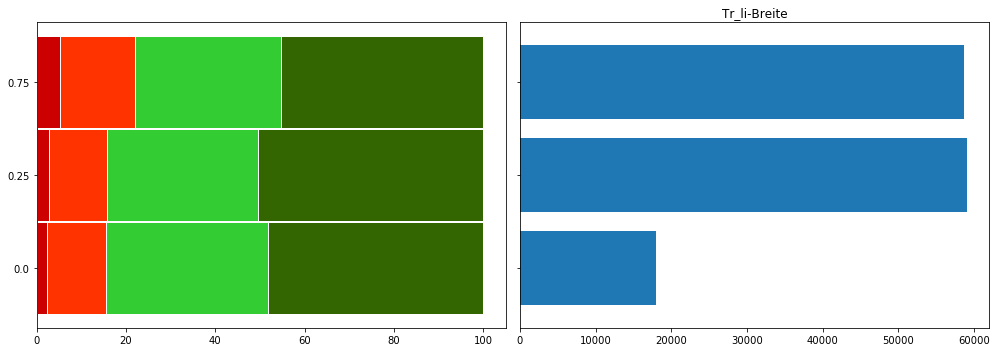

        unsafe  almost_unsafe  almost_safe       safe
0.00  2.346480      13.102568    36.339935  48.211017
0.25  2.745550      12.933385    33.801934  50.519131
0.75  5.206702      16.794933    32.743649  45.254716


In [21]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Tr_li-Breite","rating"]])

### g) Einflussfaktor "Trennung links - baulich"
Gruppe1: mit baulicher Trennung <br>
Gruppe2: ohne bauliche Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

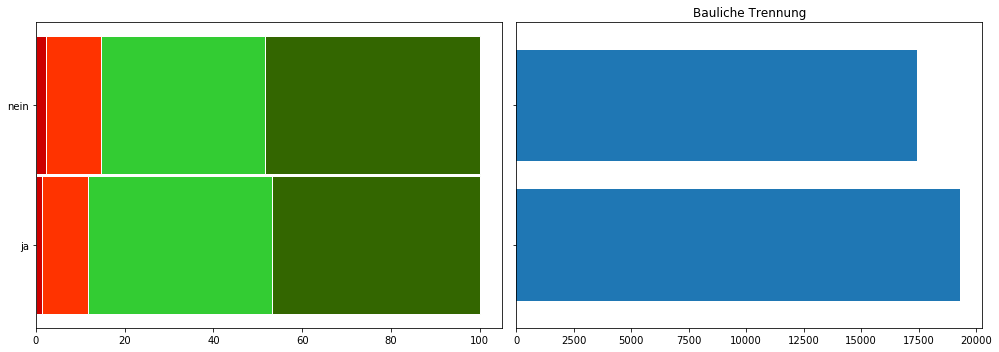

          unsafe  almost_unsafe  almost_safe       safe
group1  1.308561      10.395937    41.407546  46.887956
group2  2.205376      12.347806    36.957271  48.489547
Mittelwert von  ja - 2.3387489635157546
Mittelwert von  nein - 2.317309901217551
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 0.9251702712243645
Ist der Unterschied signifikant? True
sicher Gruppe 1  86.1525704809287 sicher Gruppe2 83.10934987365034


In [22]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li_baulTrennung"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li_baulTrennung"] == "Sperrpfosten")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche Trennung", ["ja", "nein"])
group_comparison(group1,group2)

#### g1) Einflussfaktor  "Trennung links - baulich" <br> nur mit fließendem Verkehr
Gruppe1: mit baulicher Trennun <br>
Gruppe2: ohne bauliche Trennung


Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

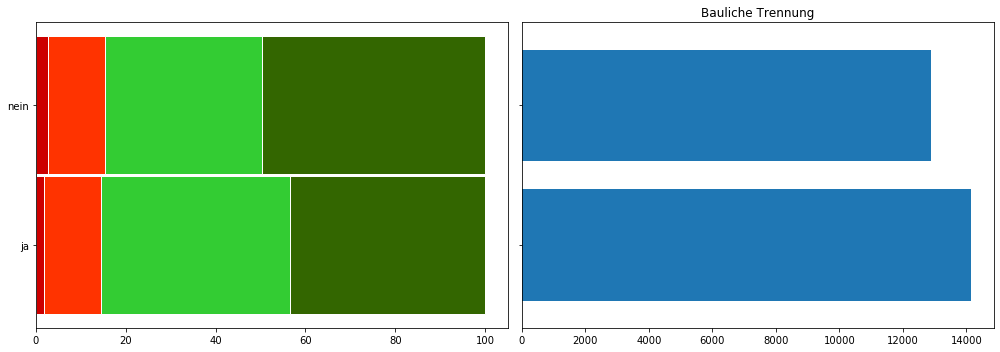

          unsafe  almost_unsafe  almost_safe       safe
group1  1.897929      12.557433    42.058387  43.486252
group2  2.601178      12.757792    34.966661  49.674368
Mittelwert von  ja - 2.271329610518131
Mittelwert von  nein - 2.317142192587998
Bootstrap Ergebnis: -20.0    (-20.0, -20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) -1.9771156995203407
Ist der Unterschied signifikant? True
sicher Gruppe 1  83.38870431893687 sicher Gruppe2 82.73375717165452


In [23]:
df = bike_data["cp"]
df = df[(df["Links_RVA"] == "Fahrstreifen")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li_baulTrennung"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li_baulTrennung"] == "Sperrpfosten")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche Trennung", ["ja", "nein"])
group_comparison(group1,group2)

#### g2) Einflussfaktor  "Trennung links - baulich" <br> nur Parken
Gruppe1: mit baulicher Trennun <br>
Gruppe2: ohne bauliche Trennung

Ergebnisse für Gesamtgruppe


<Figure size 432x288 with 0 Axes>

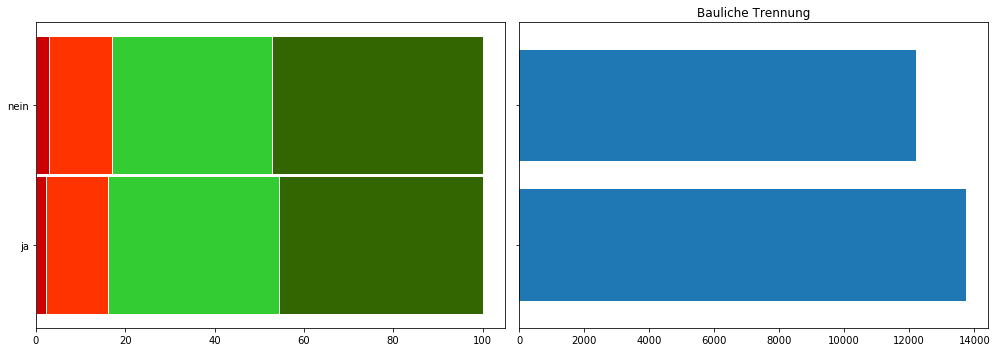

          unsafe  almost_unsafe  almost_safe       safe
group1  2.362233      13.722064    38.385383  45.530320
group2  3.020629      14.051244    35.805501  47.122626
Mittelwert von  ja - 2.270837883089466
Mittelwert von  nein - 2.27030124426981
Bootstrap Ergebnis: -20.0    (-40.0, -20.0)
Unterschied im Mittelwert von ja zu nein (in Prozent) 0.023637339802839774
Ist der Unterschied signifikant? True
sicher Gruppe 1  81.83009390696658 sicher Gruppe2 80.90209561231173


In [24]:
df = bike_data["cp"]
df = df[(df["Links_RVA"] == "Parken")]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

print ('Ergebnisse für Gesamtgruppe')
group1 = df[(df["Tr_li_baulTrennung"] == "-")] [["rating", "sessionID"]]
group2 = df[(df["Tr_li_baulTrennung"] == "Sperrpfosten")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche Trennung", ["ja", "nein"])
group_comparison(group1,group2)

### h) Einflussfaktor "Links RVA"
Gruppe 1: Fahrstreifen
Gruppe 2: Parken

<Figure size 432x288 with 0 Axes>

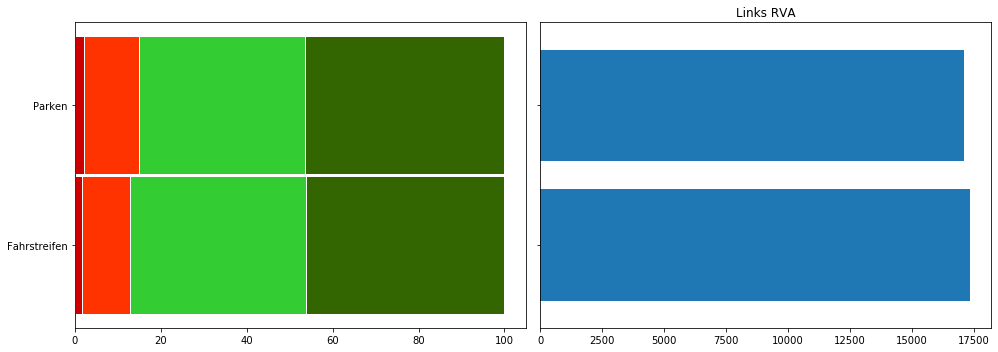

          unsafe  almost_unsafe  almost_safe       safe
group1  1.607596      11.279150    40.850843  46.262411
group2  2.129402      12.867088    38.662689  46.340821
Mittelwert von  Fahrstreifen - 2.3176806742091896
Mittelwert von  Parken - 2.292149292149292
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Fahrstreifen zu Parken (in Prozent) 1.1138620921134381
Ist der Unterschied signifikant? True
sicher Gruppe 1  84.91110598014316 sicher Gruppe2 82.56698256698257


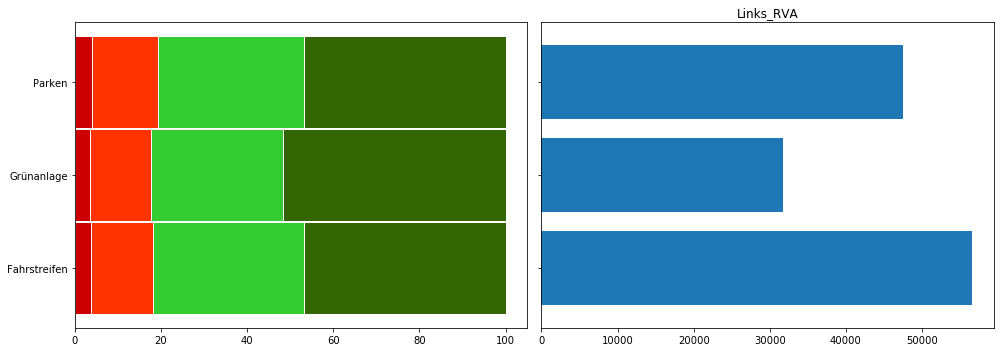

                unsafe  almost_unsafe  almost_safe       safe
Fahrstreifen  3.769582      14.325118    35.121468  46.783833
Grünanlage    3.512644      14.119947    30.730907  51.636501
Parken        3.905066      15.321495    33.935785  46.837654


In [4]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

group1 = df[(df["Links_RVA"] == "Fahrstreifen")] [["rating", "sessionID"]]
group2 = df[(df["Links_RVA"] == "Parken")] [["rating", "sessionID"]]
test_hypothesis(group1, group2, "Links RVA", ["Fahrstreifen", "Parken"])
group_comparison(group1,group2)

likert_plot (df[["Links_RVA","rating"]])

### h) Einflussfaktor "Rechts RVA"

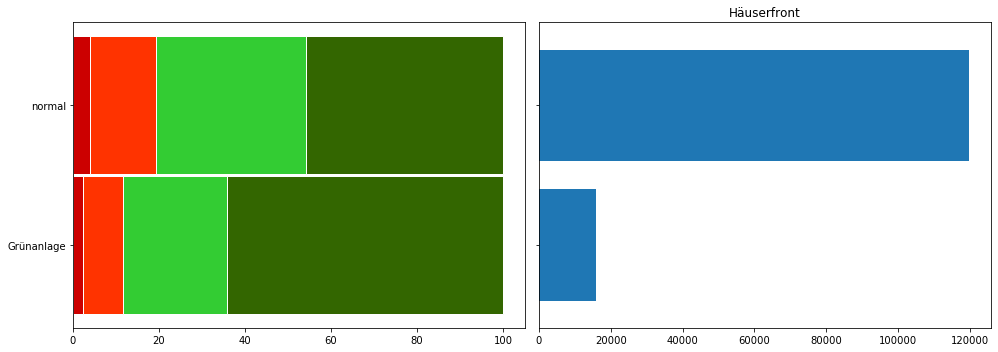

              unsafe  almost_unsafe  almost_safe       safe
Grünanlage  2.343750       9.331250    24.062500  64.262500
normal      3.945743      15.333055    34.965776  45.755426


In [27]:
df = bike_data["cp"]
df_w = df[(df["gender"] == "w")]
df_m = df[(df["gender"] == "m")]
df_u30 = df[df["ageGroup"] <= 2]
df_30_64 = df[(df["ageGroup"] >= 3) | (df["ageGroup"] <= 5)]
df_ue64 = df[df["ageGroup"] >= 6]
df_Bs =df[df["transportRatings_bicycle"] <= 1] # selten Fahrrad
df_Br = df[(df["transportRatings_bicycle"] == 2) | (df["transportRatings_bicycle"] == 3)]  # regelmäßig Fahrrad
df_Bo = df[df["transportRatings_bicycle"] >= 4] # oft Fahrrad

likert_plot (df[["Häuserfront","rating"]])